In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

def load_climate_data(file_path="../data/yearly_climate_nepal.csv"):
    try:
        df = pd.read_csv(file_path)
        print("Data loaded successfully.")
        return df
    except FileNotFoundError:
        print(f"File not found at {file_path}. Please check the path.")
    except Exception as e:
        print(f"An error occurred: {e}")


In [6]:
df = load_climate_data()
df

Data loaded successfully.


,year,avg_mean_temp,avg_min_temp,avg_max_temp,relative_humidity,precipitation_max,annual_rainfall,agri_land_area,cropland_pct,fertilizer_kg_per_ha,population_density
0,1950,11.240000,6.660000,15.710000,74.930000,88.270000,41.292567,40334.66129,0.537348,27.372378,141.571356
1,1951,11.210000,6.530000,15.840000,74.990000,91.140000,41.292567,40334.66129,0.537348,27.372378,141.571356
2,1952,10.840000,6.420000,15.230000,78.170000,74.800000,41.292567,40334.66129,0.537348,27.372378,141.571356
3,1953,10.900000,6.420000,15.380000,77.450000,102.320000,41.292567,40334.66129,0.537348,27.372378,141.571356
4,1954,11.480000,6.710000,16.240000,70.610000,125.670000,41.292567,40334.66129,0.537348,27.372378,141.571356
...,...,...,...,...,...,...,...,...,...,...,...
71,2021,13.090000,8.260000,18.180000,74.830000,90.770000,48.831357,41210.00000,0.985219,112.610654,205.615696
72,2022,13.250000,8.480000,18.330000,75.120000,81.490000,41.900270,41210.00000,1.011510,67.843176,207.292892
73,2023,13.170000,8.100000,18.430000,73.240000,71.510000,36.619854,40334.66129,0.537348,27.372378,141.571356
74,2024,12.321081,7.124324,17.366486,71.594054,93.882973,37.768686,40334.66129,0.537348,27.372378,141.571356


In [ ]:
def prepare_features(df, target='avg_mean_temp'):
    # Define features to use (excluding target and obviously correlated columns)
    features = [
        'year',
        'avg_min_temp', 'avg_max_temp', 'relative_humidity',
        'precipitation_max', 'annual_rainfall',
        'agri_land_area', 'cropland_pct', 'fertilizer_kg_per_ha',
        'population_density'
    ]

    # Drop target from feature list if present
    if target in features:
        features.remove(target)

    X = df[features]
    y = df[target]

    return X, y

In [9]:
X, y = prepare_features(df, target='avg_mean_temp')

In [10]:
X


,year,avg_min_temp,avg_max_temp,relative_humidity,precipitation_max,annual_rainfall,agri_land_area,cropland_pct,fertilizer_kg_per_ha,population_density
0,1950,6.660000,15.710000,74.930000,88.270000,41.292567,40334.66129,0.537348,27.372378,141.571356
1,1951,6.530000,15.840000,74.990000,91.140000,41.292567,40334.66129,0.537348,27.372378,141.571356
2,1952,6.420000,15.230000,78.170000,74.800000,41.292567,40334.66129,0.537348,27.372378,141.571356
3,1953,6.420000,15.380000,77.450000,102.320000,41.292567,40334.66129,0.537348,27.372378,141.571356
4,1954,6.710000,16.240000,70.610000,125.670000,41.292567,40334.66129,0.537348,27.372378,141.571356
...,...,...,...,...,...,...,...,...,...,...
71,2021,8.260000,18.180000,74.830000,90.770000,48.831357,41210.00000,0.985219,112.610654,205.615696
72,2022,8.480000,18.330000,75.120000,81.490000,41.900270,41210.00000,1.011510,67.843176,207.292892
73,2023,8.100000,18.430000,73.240000,71.510000,36.619854,40334.66129,0.537348,27.372378,141.571356
74,2024,7.124324,17.366486,71.594054,93.882973,37.768686,40334.66129,0.537348,27.372378,141.571356


In [11]:
y

0     11.240000
1     11.210000
2     10.840000
3     10.900000
4     11.480000
        ...    
71    13.090000
72    13.250000
73    13.170000
74    12.321081
75    12.321081
Name: avg_mean_temp, Length: 76, dtype: float64

In [13]:
# Set visual style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [14]:
def plot_eda(df):
    """
    Perform EDA with different visualizations on Nepal climate dataset.
    """

    # 1. Line plot of average mean temperature over years
    plt.figure()
    sns.lineplot(x='year', y='avg_mean_temp', data=df, marker='o', color='tomato')
    plt.title('Average Mean Temperature Over Years')
    plt.xlabel('Year')
    plt.ylabel('Avg Mean Temp (°C)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 2. Bar plot of annual rainfall over years
    plt.figure()
    sns.barplot(x='year', y='annual_rainfall', data=df, palette='Blues_d')
    plt.title('Annual Rainfall Over Years')
    plt.xticks(rotation=45)
    plt.xlabel('Year')
    plt.ylabel('Annual Rainfall (mm)')
    plt.tight_layout()
    plt.show()

    # 3. Scatter plot: population density vs avg_mean_temp
    plt.figure()
    sns.scatterplot(x='population_density', y='avg_mean_temp', data=df, hue='year', palette='coolwarm', legend=False)
    plt.title('Population Density vs Avg Mean Temp')
    plt.xlabel('Population Density')
    plt.ylabel('Avg Mean Temp (°C)')
    plt.tight_layout()
    plt.show()

    # 4. Correlation heatmap
    plt.figure()
    corr = df.select_dtypes(include='number').corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='YlGnBu')
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()

    # 5. Line plot comparing min and max temperature over time
    plt.figure()
    sns.lineplot(x='year', y='avg_min_temp', data=df, label='Min Temp', marker='o')
    sns.lineplot(x='year', y='avg_max_temp', data=df, label='Max Temp', marker='o')
    plt.title('Min and Max Temperatures Over Years')
    plt.xlabel('Year')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

	# 6. Line plot: Relative humidity over years
    plt.figure()
    sns.lineplot(x='year', y='relative_humidity', data=df, marker='o', color='teal')
    plt.title('Relative Humidity Over Years')
    plt.xlabel('Year')
    plt.ylabel('Relative Humidity (%)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 7. Scatter: Fertilizer usage vs Cropland percentage
    plt.figure()
    sns.scatterplot(x='fertilizer_kg_per_ha', y='cropland_pct', data=df, hue='year', palette='viridis', s=80)
    plt.title('Fertilizer Use vs Cropland Percentage')
    plt.xlabel('Fertilizer (kg/ha)')
    plt.ylabel('Cropland Area (%)')
    plt.tight_layout()
    plt.show()

    # 8. Line plot: Agricultural land area over years
    plt.figure()
    sns.lineplot(x='year', y='agri_land_area', data=df, marker='o', color='brown')
    plt.title('Agricultural Land Area Over Years')
    plt.xlabel('Year')
    plt.ylabel('Agri Land Area (sq km)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 9. Population growth trend
    plt.figure()
    sns.lineplot(x='year', y='population_density', data=df, marker='o', color='purple')
    plt.title('Population Density Growth Over Years')
    plt.xlabel('Year')
    plt.ylabel('People per sq km')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 10. Pairplot of climate and agriculture features
    climate_cols = [
        'avg_mean_temp', 'avg_min_temp', 'avg_max_temp',
        'annual_rainfall', 'precipitation_max',
        'agri_land_area', 'cropland_pct', 'fertilizer_kg_per_ha'
    ]
    sns.pairplot(df[climate_cols], diag_kind='kde', corner=True)
    plt.suptitle("Pairwise Relationships Between Climate & Agri Features", y=1.02)
    plt.tight_layout()
    plt.show()

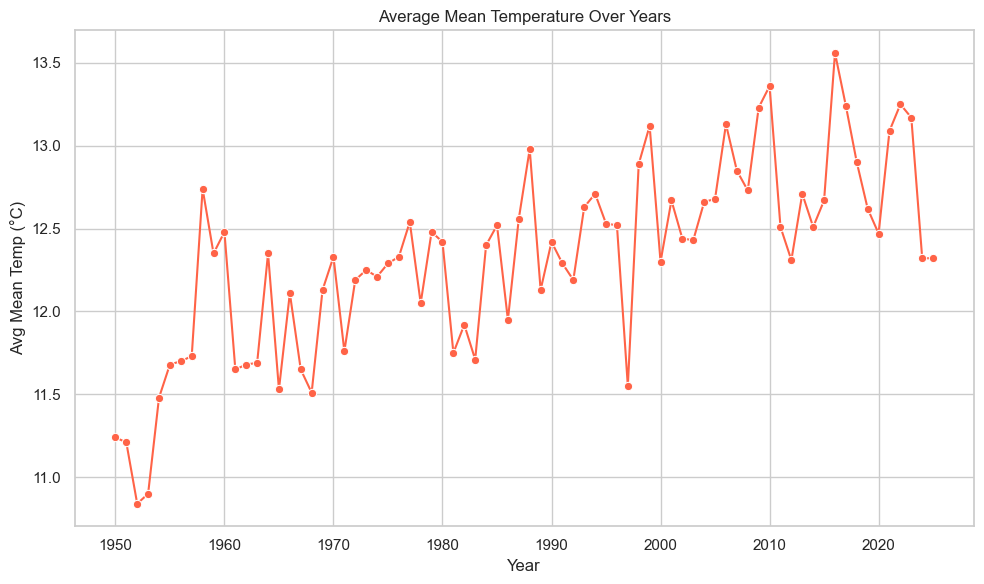

C:\Users\sabin\AppData\Local\Temp\ipykernel_4296\24697278.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='annual_rainfall', data=df, palette='Blues_d')


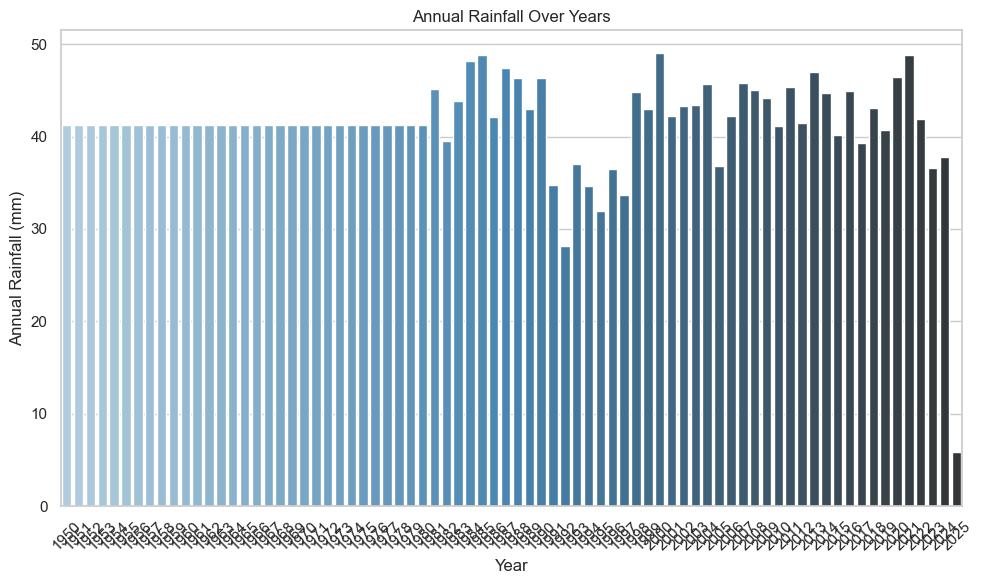

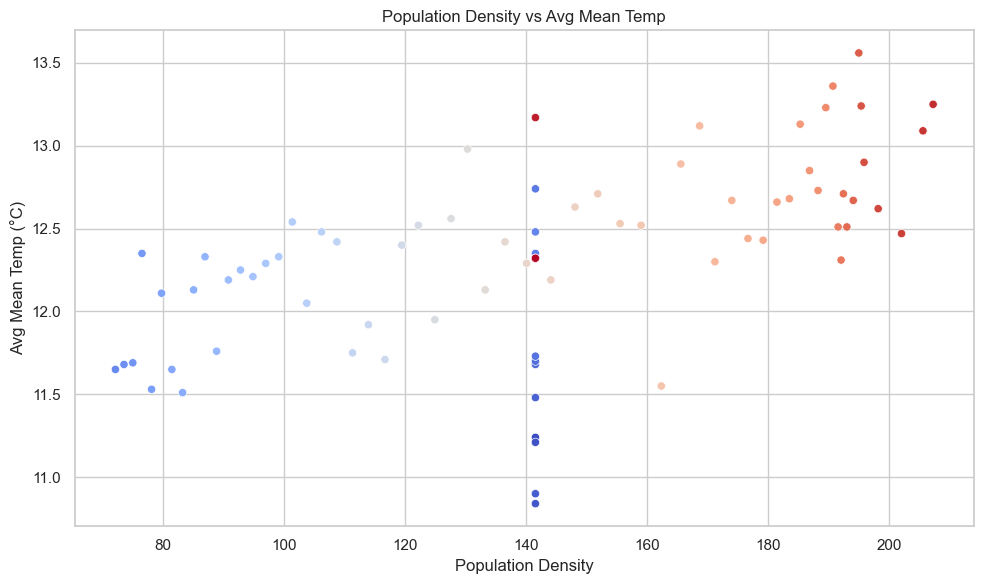

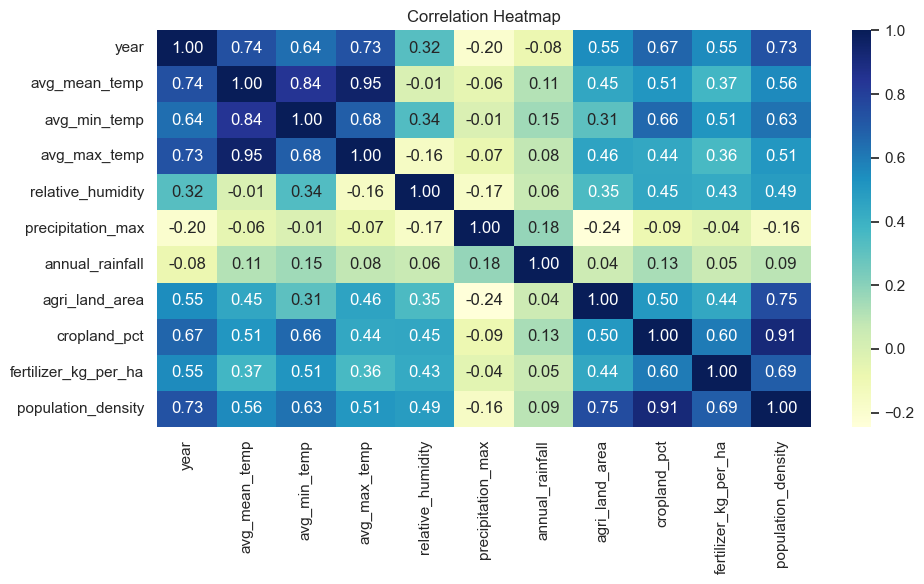

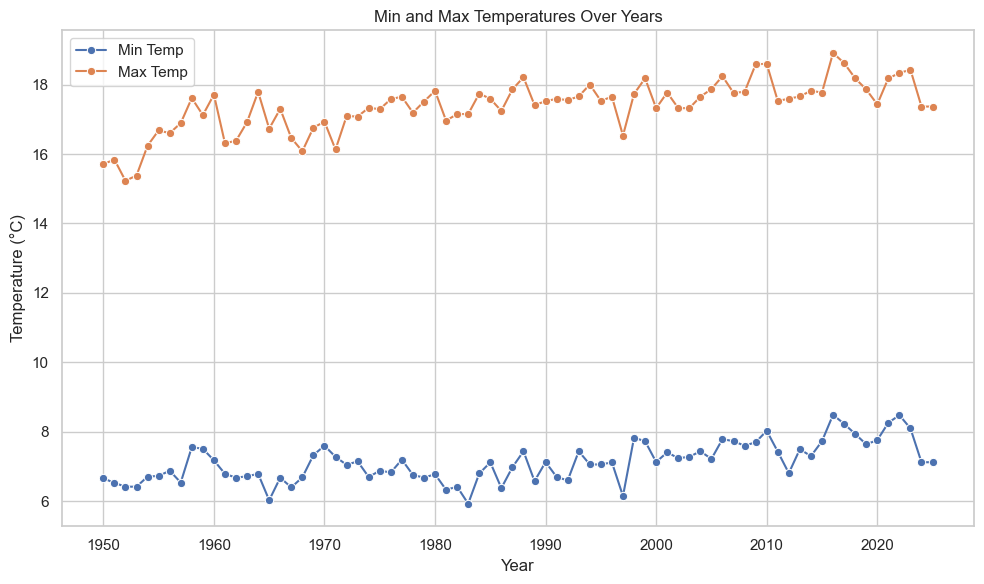

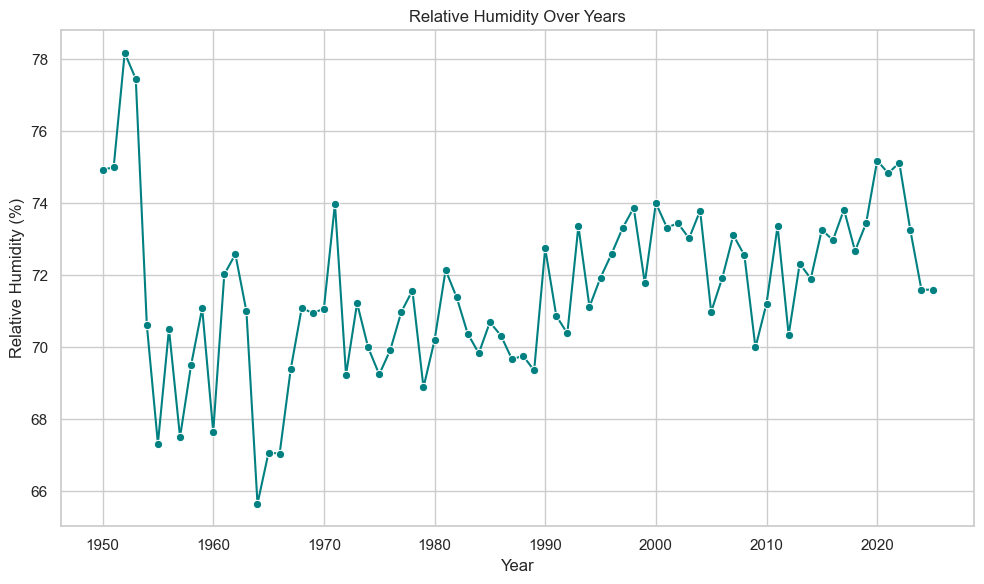

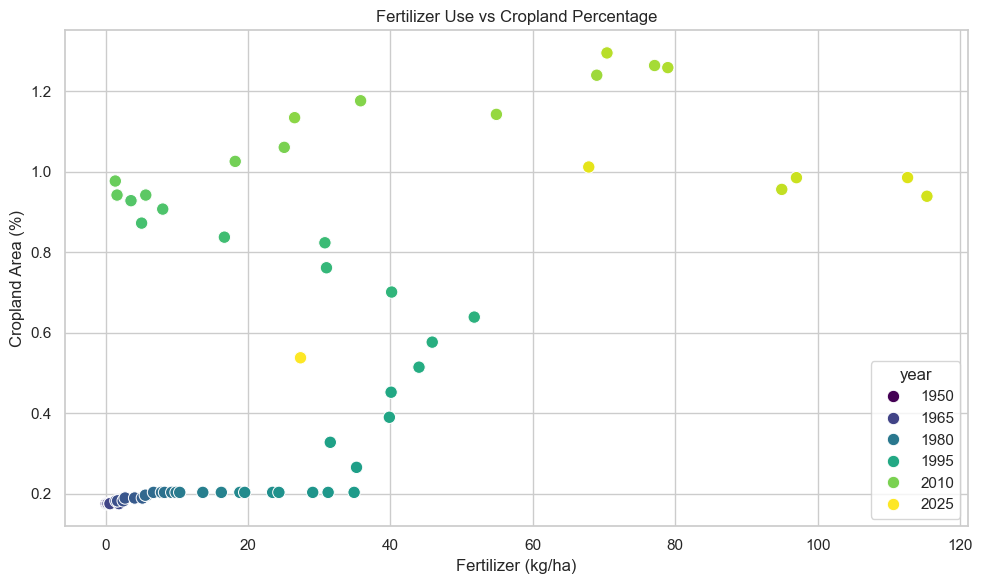

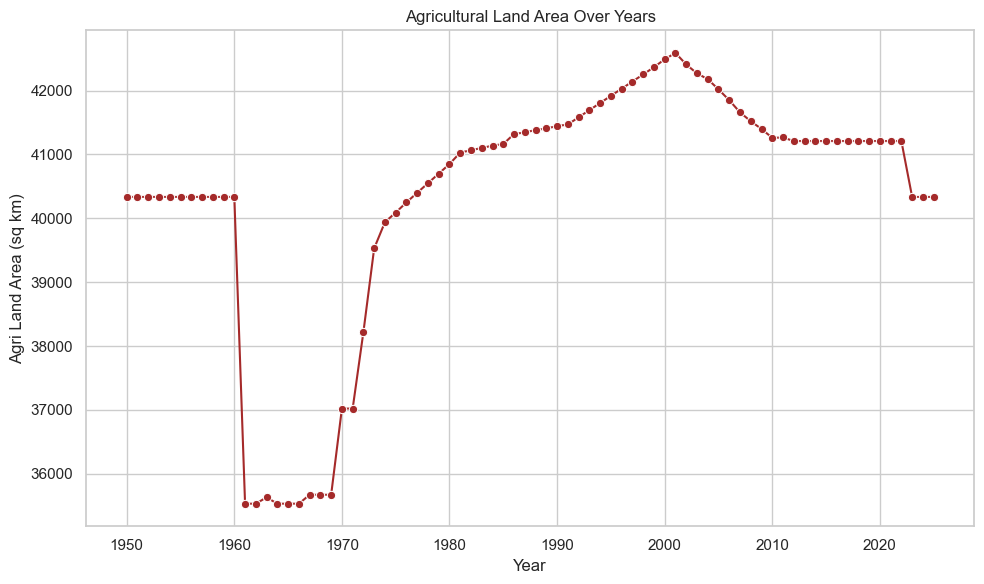

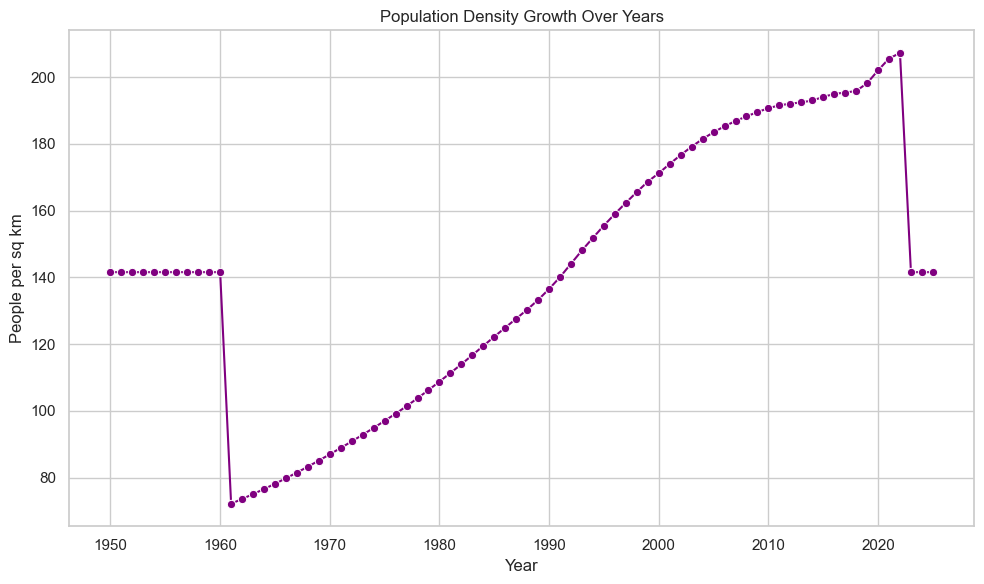

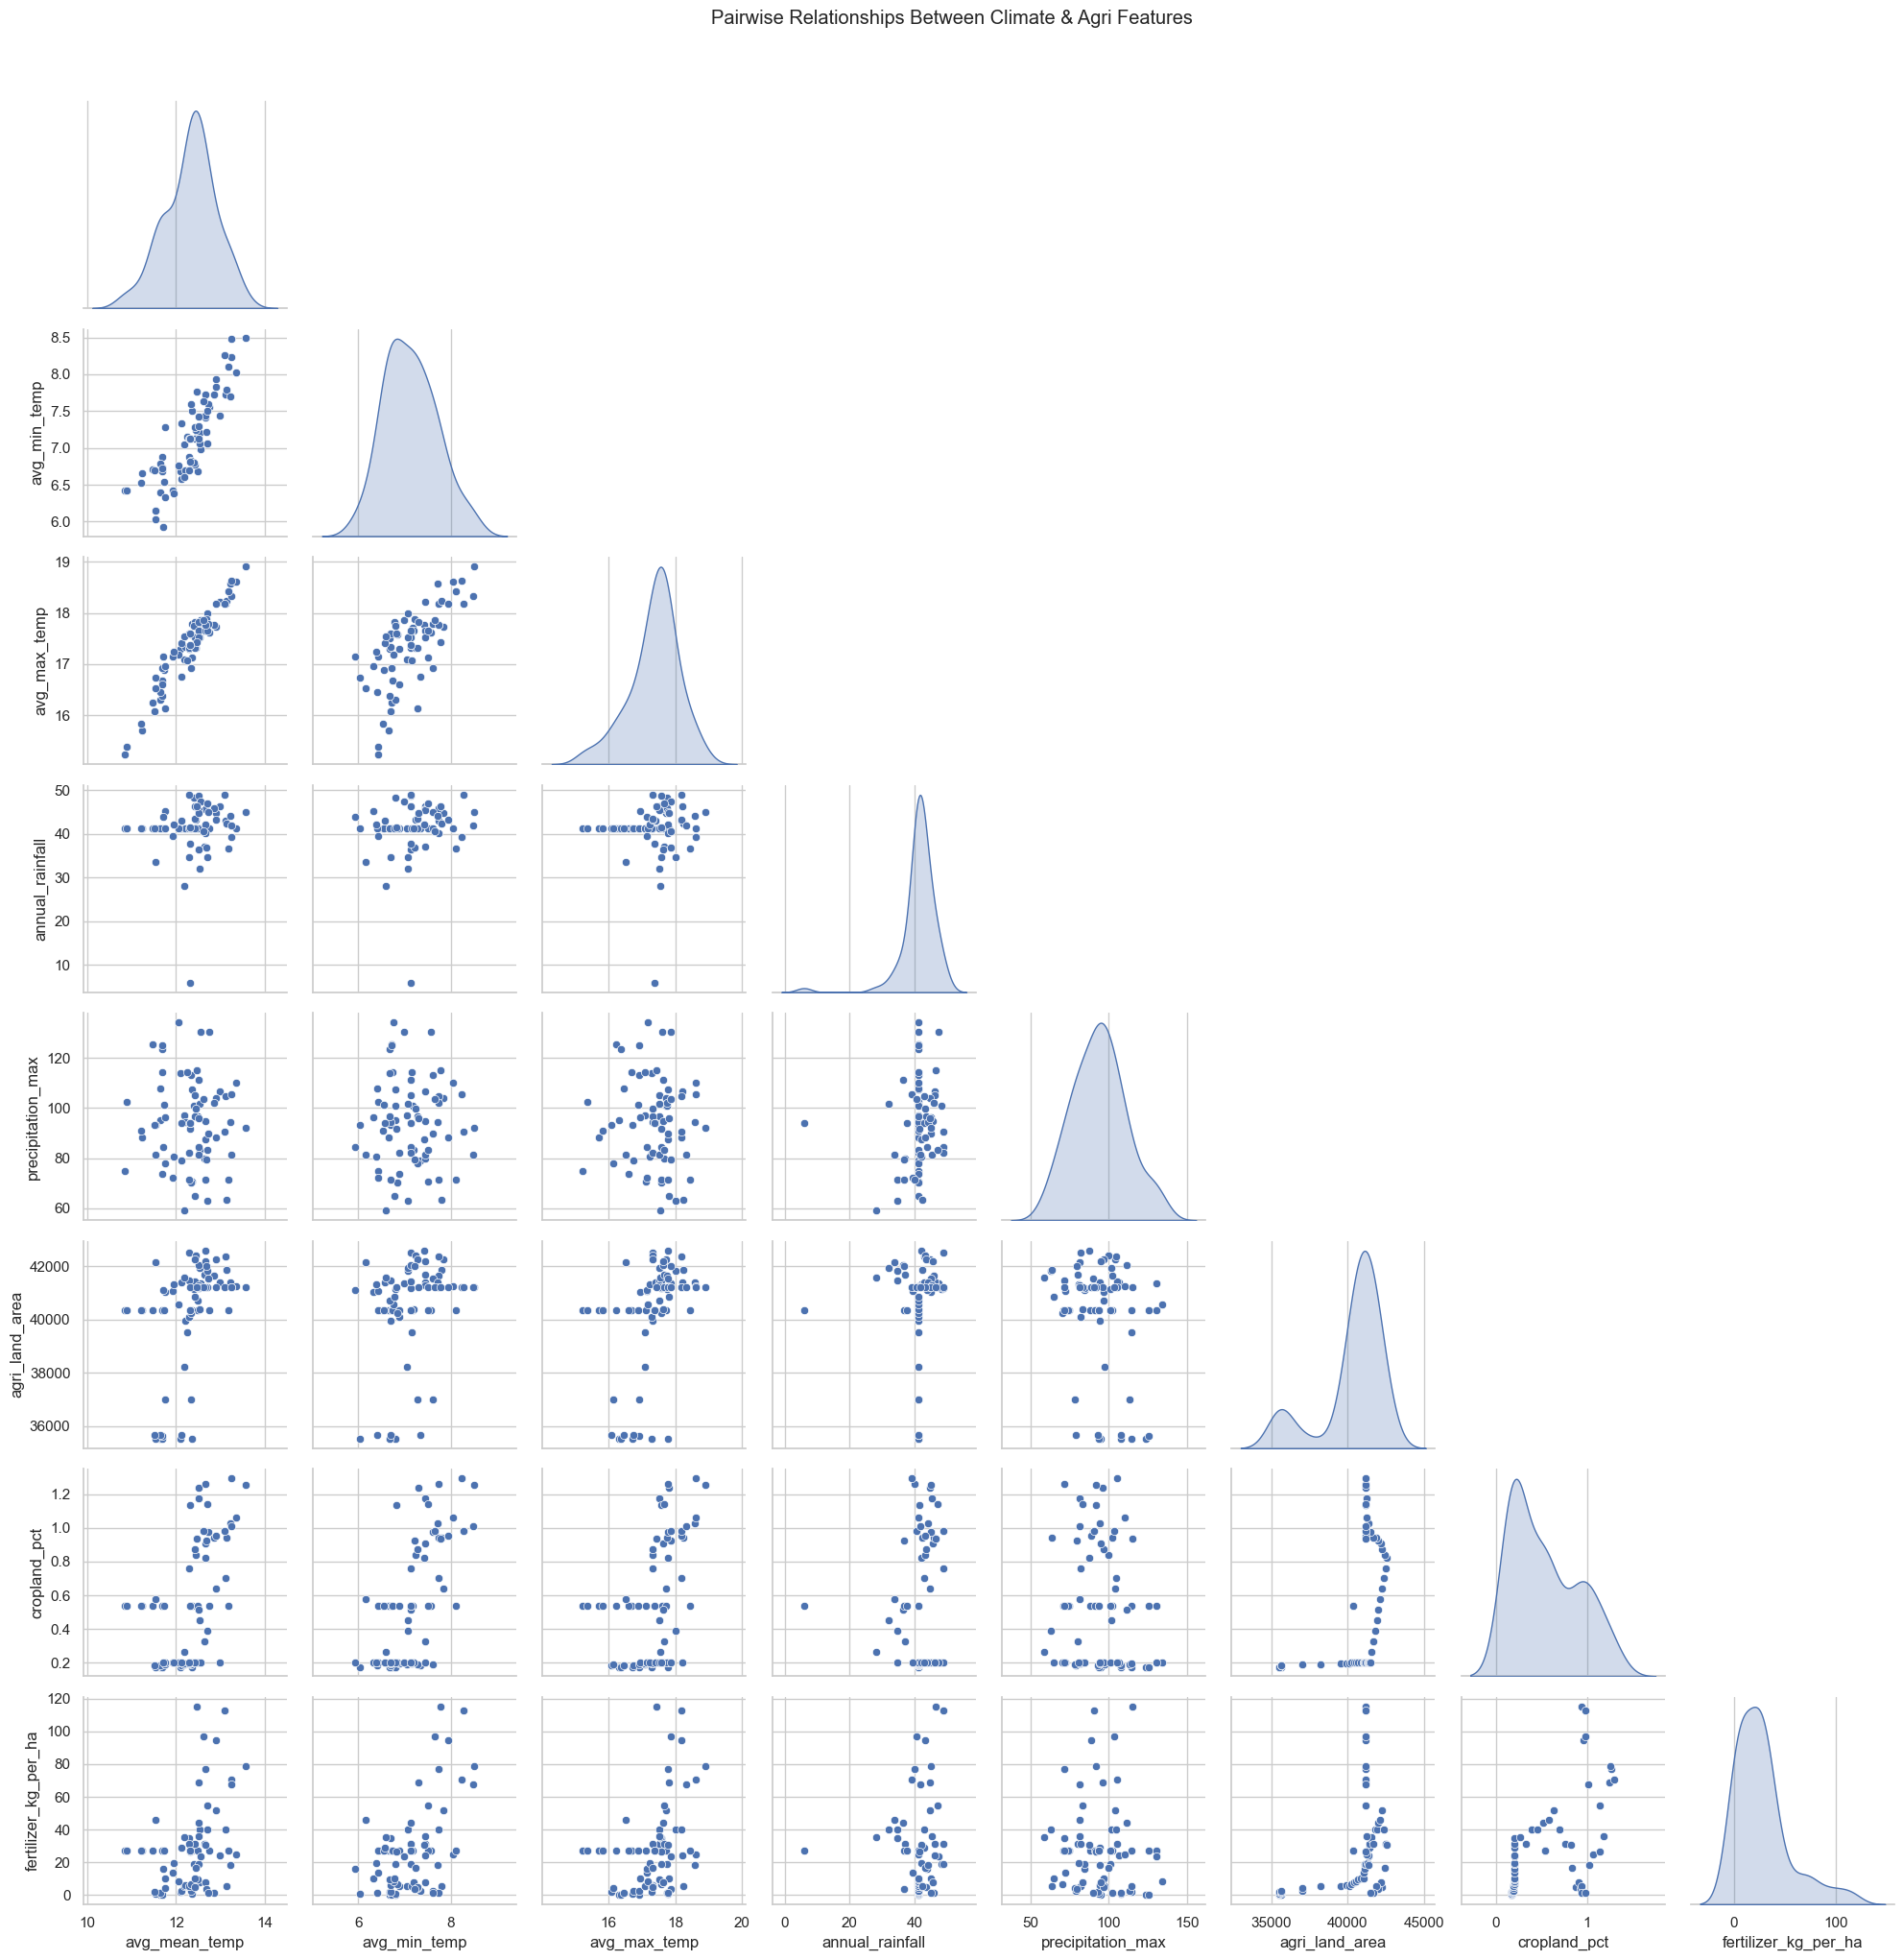

In [15]:
plot_eda(df)